In [5]:
import neurokit2 as nk
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [12]:
# generate synthetic ppg
s_rate = 64

ppg = nk.ppg_simulate(duration=30, sampling_rate=s_rate, heart_rate=70)

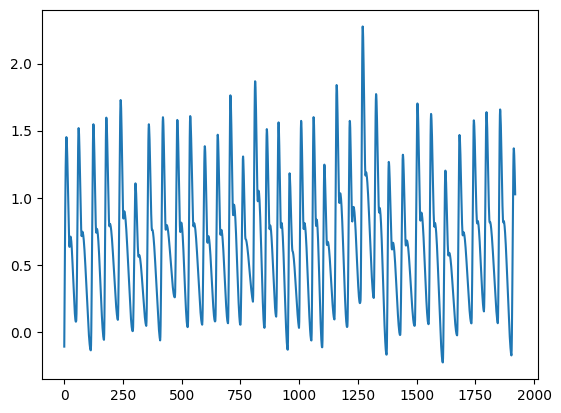

In [13]:
plt.plot(ppg)

In [16]:

def ppg_segment(ppg_cleaned, sampling_rate, peaks=None, show=True):

    # Sanitize inputs
    if peaks is None:
        _, peaks = nk.ppg_peaks(ppg_cleaned, sampling_rate=sampling_rate)
        peaks = peaks["PPG_Peaks"]

    if len(ppg_cleaned) < sampling_rate * 4:
        raise ValueError("The data length is too small to be segmented.")

    epochs_start, epochs_end, average_hr = nk.ecg.ecg_segment(
        rpeaks=peaks,
        sampling_rate=sampling_rate,
        desired_length=len(ppg_cleaned),
        ratio_pre=0.3,
    )
    heartbeats = nk.epochs.epochs_create(
        ppg_cleaned,
        peaks,
        sampling_rate=sampling_rate,
        epochs_start=epochs_start,
        epochs_end=epochs_end,
    )

    # pad last heartbeat with nan so that segments are equal length
    last_heartbeat_key = str(np.max(np.array(list(heartbeats.keys()), dtype=int)))
    after_last_index = heartbeats[last_heartbeat_key]["Index"] < len(ppg_cleaned)
    heartbeats[last_heartbeat_key].loc[after_last_index, "Signal"] = np.nan

    if show is not False:
        ax = nk.ecg.ecg_segment._ecg_segment_plot(
            heartbeats, heartrate=average_hr, ytitle="PPG", color="#E91E63", **kwargs
        )
    if show == "return":
        return ax

    return heartbeats

In [17]:
ppg_segment(ppg, s_rate)

TypeError: ecg_segment() missing 1 required positional argument: 'ecg_cleaned'